In [587]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [588]:
data = pd.read_csv("House_Rent_Dataset.csv")

In [589]:
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


## Data Visualization

<BarContainer object of 6 artists>

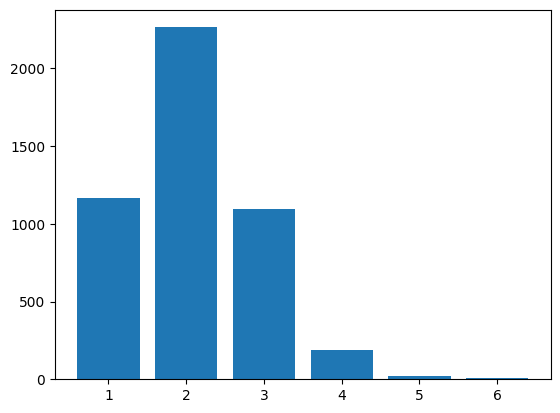

In [590]:
plt.bar(data['BHK'].value_counts().index, data['BHK'].value_counts().values)

<BarContainer object of 615 artists>

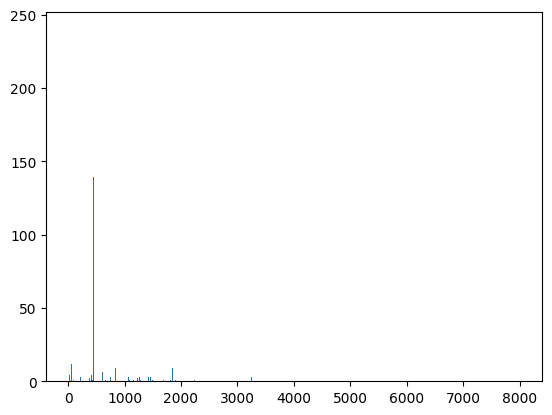

In [591]:
plt.bar(data['Size'].value_counts().index, data['Size'].value_counts().values)

<BarContainer object of 3 artists>

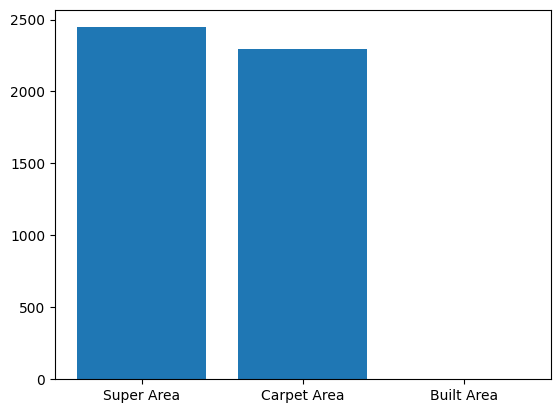

In [592]:
plt.bar(data['Area Type'].value_counts().index, data['Area Type'].value_counts().values)

<BarContainer object of 2235 artists>

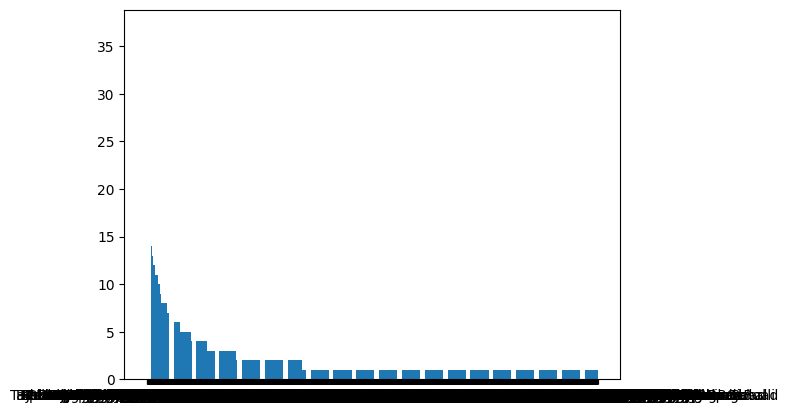

In [593]:
plt.bar(data['Area Locality'].value_counts().index, data['Area Locality'].value_counts().values)

<BarContainer object of 3 artists>

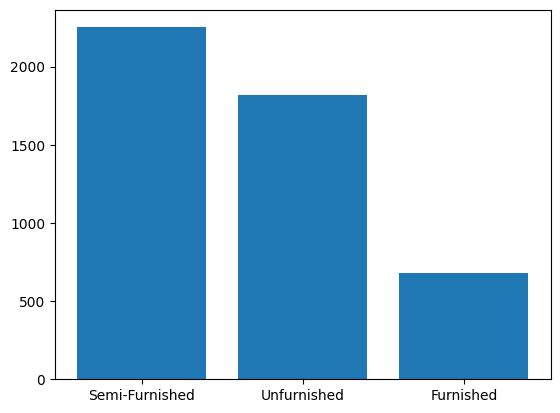

In [594]:
plt.bar(data['Furnishing Status'].value_counts().index, data['Furnishing Status'].value_counts().values)

<BarContainer object of 8 artists>

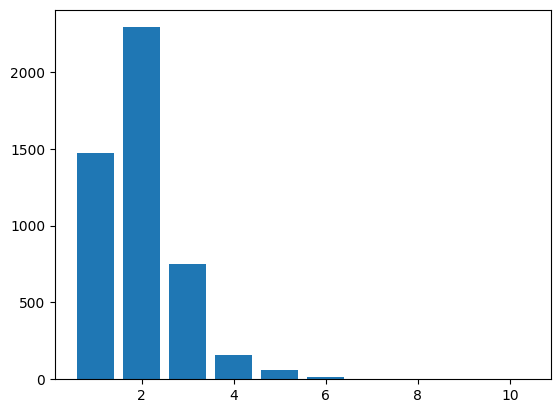

In [595]:
plt.bar(data['Bathroom'].value_counts().index, data['Bathroom'].value_counts().values)

## Preprocessing

### Conversion of Categorical Variable to One-Hot Encoding

In [596]:
data = data[['BHK', 'Size', 'Area Type', 'Furnishing Status', 'Bathroom', 'Rent']]

In [597]:
data.head(5)

,BHK,Size,Area Type,Furnishing Status,Bathroom,Rent
0,2,1100,Super Area,Unfurnished,2,10000
1,2,800,Super Area,Semi-Furnished,1,20000
2,2,1000,Super Area,Semi-Furnished,1,17000
3,2,800,Super Area,Unfurnished,1,10000
4,2,850,Carpet Area,Unfurnished,1,7500


In [598]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [599]:
data = one_hot_encode(data, 'Area Type')
# data = one_hot_encode(data, 'Area Locality')
data = one_hot_encode(data, 'Furnishing Status')

In [600]:
data.head(5)

,BHK,Size,Bathroom,Rent,Carpet Area,Super Area,Semi-Furnished,Unfurnished
0,2,1100,2,10000,False,True,False,True
1,2,800,1,20000,False,True,True,False
2,2,1000,1,17000,False,True,True,False
3,2,800,1,10000,False,True,False,True
4,2,850,1,7500,True,False,False,True


### Feature Engineering

### Cleaning Outliers for Integer Data Type

In [601]:
columns_to_check = ['BHK', 'Size', 'Bathroom'] 

# Create an empty DataFrame to store the cleaned data
data_cleaned = pd.DataFrame()

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect and remove outliers for the current column
    data_cleaned_column = data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]
    
    # Append the cleaned data for this column to the overall cleaned DataFrame
    data_cleaned = pd.concat([data_cleaned, data_cleaned_column], axis=1)

In [ ]:

threshold = 100

one_hot_encoded_columns = ['Super Area', 'Carpet Area', 'Semi-Furnished', 'Unfurnished'] 

for column_name in one_hot_encoded_columns:
    category_counts = data[column_name].sum()
    data[column_name] = data[column_name].apply(lambda x: 0 if category_counts < threshold else x)


### Training and Test Split

In [ ]:
X = data.drop('Rent', axis=1)
y = data['Rent']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Modelling

In [ ]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([ -783.62339304, 15074.60589696, 21123.5370023 , 13427.59845348,
        1718.11509361, -8131.08954918, -7717.65827447])

## Evaluation

### Quantitative Evaluation

In [ ]:
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ -783.62339304 15074.60589696 21123.5370023  13427.59845348
  1718.11509361 -8131.08954918 -7717.65827447]
Mean squared error: 2393759242.15
Coefficient of determination: 0.40


### Qualitative Evaluation

In [ ]:
sample_data = X.iloc[0]
sample_data

BHK                   2
Size               1100
Bathroom              2
Carpet Area       False
Super Area         True
Semi-Furnished    False
Unfurnished        True
Name: 0, dtype: object

In [ ]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

c:\Users\Andrea Dayo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
model_rent_forecast

25760.0013318824

In [ ]:
y.iloc[0]

10000

## Simple Linear Regression Model

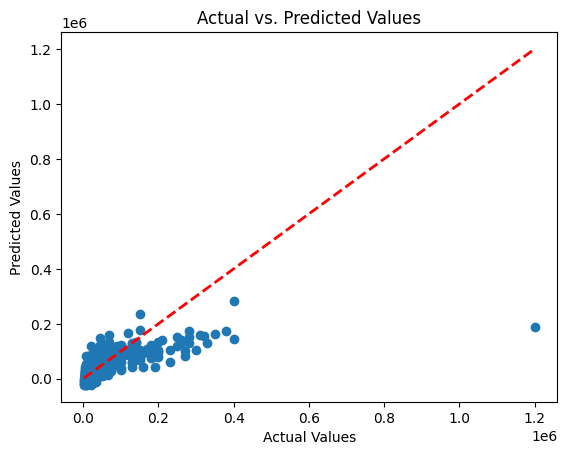

In [ ]:
plt.scatter(y_test, y_preds)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.savefig("linear_regression_plot.png")
plt.show()